# physt: Notebook to support the PyData Berlin 2018 talk

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint

import physt
from physt import h1, h2, h3

In [2]:
# Matplotlib 
def update_matplotlib_rc(size=16):
    font = {'size': str(size), 'family': 'Ubuntu'}
    plt.rc('font', **font)  # pass in the font dict as kwargs
    
update_matplotlib_rc()

In [3]:
# Matplotlib shortcuts
def create_axis():
    return plt.subplots(figsize=(7, 5))

def square_axis():
    return plt.subplots(figsize=(5, 5))

def save_fig(fig, path):
    fig.tight_layout()
    fig.savefig(path)
    print("Saved {0}".format(path))

## Data used in the talk

In [4]:
## Basic properties of people in Fakeland

np.random.seed(42)

# Number of adults in Fakeland
FAKELAND_POPULATION = 1000

# Heights of people in Fakeland
heights = np.random.normal(172.7, 12.5, size=FAKELAND_POPULATION)

# Weight of people in Fakeland (correlated with height)
weights = (heights - 100 +
           np.random.normal(0, 12.5, size=FAKELAND_POPULATION))

# I.Q. of people in Fakeland (uncorrelated)
iqs = np.random.normal(100, 15, FAKELAND_POPULATION)

# Number of children
children = np.random.poisson(1.35, FAKELAND_POPULATION)

In [5]:
## Additional data
TRUELAND_POPULATION = 500
trueland_heights = np.random.normal(194, 5, 500)

basketball_heights = np.random.normal(220, 15, 200)

In [6]:
## Country data for exponential histograms
countries = pd.read_csv("../data/countries.csv", skiprows=4)
countries = countries[["Country Name", "2016"]]
countries.columns = ["Country", "Population"]
countries.sort_values("Country", inplace=True)

## Examples of non-histograms

Saved ../images/bar-plot.svg


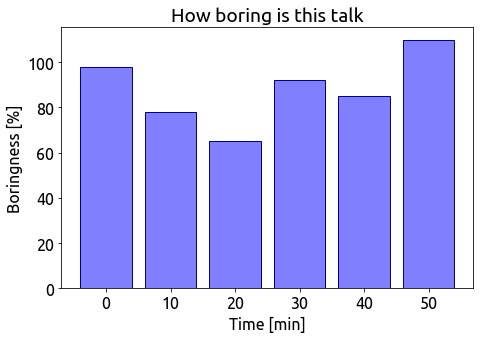

In [7]:
# Bar plot 1
t = [0, 10, 20, 30, 40, 50]
b = [98, 78, 65, 92, 85, 110]

fig, ax = create_axis()
ax.bar(t, b, width=8, linewidth=1, color="#8080ff", edgecolor="#000080")
ax.set_xlabel("Time [min]")
ax.set_ylabel("Boringness [%]")
ax.set_title("How boring is this talk")

save_fig(fig, "../images/bar-plot.svg")

Saved ../images/bar-plot2.svg


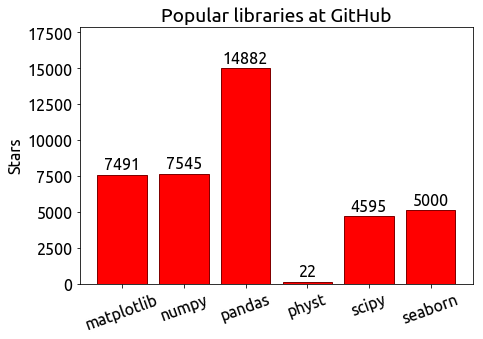

In [8]:
# Bar plot 
t = ['matplotlib', 'numpy', 'pandas', 'physt', 'scipy', 'seaborn']
b = np.array([7491, 7545, 14882, 22, 4595, 5000])

fig, ax = create_axis()

ax.bar(t, b+100, color="red", linewidth=1, edgecolor="#800000")
ax.set_ylabel("Stars")
ax.set_title("Popular libraries at GitHub")

for tick in ax.get_xticklabels():
    tick.set_rotation(20)

for i, v in enumerate(b):
    ax.text(i, v+250, str(v), va="bottom", ha="center")
ax.set_ylim(0, max(b) * 1.2)

save_fig(fig, "../images/bar-plot2.svg")

Saved ../images/kde.svg


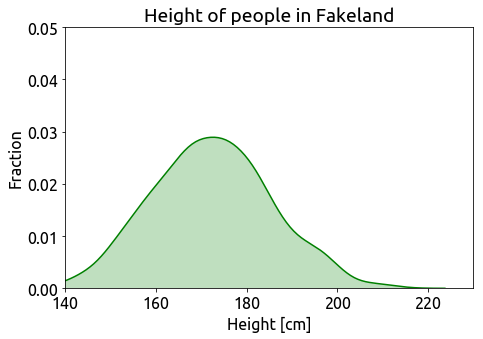

In [9]:
# KDE
fig, ax = create_axis()

x = np.random.normal(172.7, 12.5, size=1000)
sns.kdeplot(x, shade=True, ax=ax, color="green")

ax.set_title("Height of people in Fakeland")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Fraction")

xlim = (140, 230)
ylim = (0, 0.05)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

save_fig(fig, "../images/kde.svg")

Saved ../images/histogram1.svg


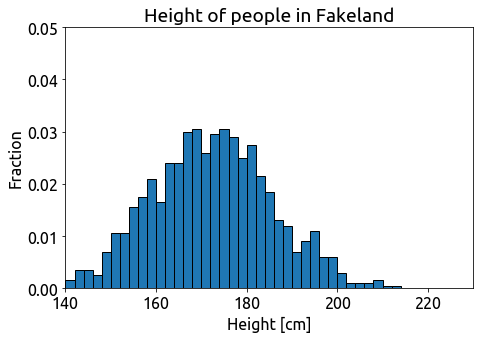

In [10]:
# Real histogram

fig, ax = create_axis()

H = physt.h1(x, "fixed_width", 2).normalize()
H.plot(density=True, ax=ax, ylim=ylim, label="histogram",
       lw=1, edgecolor="black")  # , zorder=1000)

ax.set_title("Height of people in Fakeland")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Fraction")

ax.set_xlim(xlim)
ax.set_ylim(ylim)

save_fig(fig, "../images/histogram1.svg")


Saved ../images/histogram_and_kde.svg


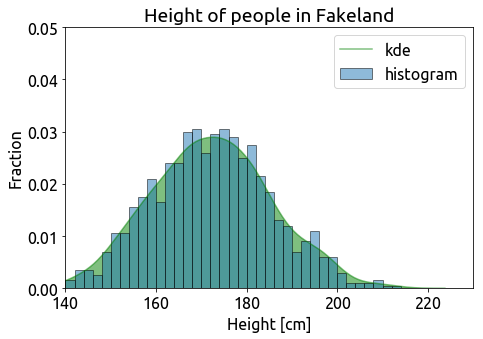

In [11]:
# Histogram + KDE
fig, ax = create_axis()

H.plot(density=True, ax=ax, ylim=ylim, label="histogram",
       alpha=0.5, lw=1, edgecolor="black")  # , zorder=1000)

ax.set_title("Height of people in Fakeland")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Fraction")

ax.set_xlim(xlim)
ax.set_ylim(ylim)

sns.kdeplot(x, shade=True, ax=ax, alpha=0.5, label="kde", color="green")
ax.legend()

save_fig(fig, "../images/histogram_and_kde.svg")

## Representation

In [12]:
# Numpy
histogram = np.histogram(heights)
pprint(histogram)

(array([  4,  22,  96, 228, 272, 226, 104,  38,   9,   1]),
 array([132.18415825, 141.05165679, 149.91915533, 158.78665386,
       167.6541524 , 176.52165094, 185.38914948, 194.25664802,
       203.12414656, 211.99164509, 220.85914363]))


(array([  4.,  22.,  96., 228., 272., 226., 104.,  38.,   9.,   1.]),
 array([132.18415825, 141.05165679, 149.91915533, 158.78665386,
       167.6541524 , 176.52165094, 185.38914948, 194.25664802,
       203.12414656, 211.99164509, 220.85914363]),
 <a list of 10 Patch objects>)
Saved ../images/matplotlib.svg


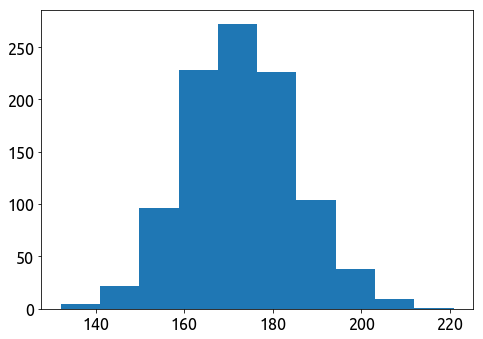

In [13]:
# Matplotlib
fig, ax = create_axis()
histogram = ax.hist(heights)
pprint(histogram)
save_fig(fig, "../images/matplotlib.svg")

In [14]:
# physt.h1
histogram = h1(heights)
print(histogram)

Histogram1D(bins=(10,), total=1000, dtype=int64)


In [15]:
print(histogram.bins)

[[132.18415825 141.05165679]
 [141.05165679 149.91915533]
 [149.91915533 158.78665386]
 [158.78665386 167.6541524 ]
 [167.6541524  176.52165094]
 [176.52165094 185.38914948]
 [185.38914948 194.25664802]
 [194.25664802 203.12414656]
 [203.12414656 211.99164509]
 [211.99164509 220.85914363]]


In [16]:
print(histogram.numpy_bins)

[132.18415825 141.05165679 149.91915533 158.78665386 167.6541524
 176.52165094 185.38914948 194.25664802 203.12414656 211.99164509
 220.85914363]


In [17]:
print(histogram.frequencies)

[  4  22  96 228 272 226 104  38   9   1]


In [18]:
histogram.name = "Heights"
histogram.title = "How tall are people in Fakeland?"
histogram.axis_name = "Height [cm]"
print(histogram)

Histogram1D('Heights', bins=(10,), total=1000, dtype=int64)


In [19]:
print(histogram.meta_data)

{'name': 'Heights', 'axis_names': ('Height [cm]',), 'title': 'How tall are people in Fakeland?'}


In [20]:
# JSON
print(histogram.to_json(indent=2))

{
  "histogram_type": "Histogram1D",
  "binnings": [
    {
      "adaptive": false,
      "binning_type": "NumpyBinning",
      "numpy_bins": [
        132.18415824913657,
        141.0516567875413,
        149.91915532594606,
        158.7866538643508,
        167.65415240275553,
        176.5216509411603,
        185.38914947956502,
        194.25664801796978,
        203.1241465563745,
        211.99164509477924,
        220.859143633184
      ]
    }
  ],
  "frequencies": [
    4,
    22,
    96,
    228,
    272,
    226,
    104,
    38,
    9,
    1
  ],
  "dtype": "int64",
  "errors2": [
    4,
    22,
    96,
    228,
    272,
    226,
    104,
    38,
    9,
    1
  ],
  "meta_data": {
    "name": "Heights",
    "axis_names": [
      "Height [cm]"
    ],
    "title": "How tall are people in Fakeland?"
  },
  "missed": [
    0,
    0,
    0
  ],
  "missed_keep": true,
  "physt_version": "0.3.39.1",
  "physt_compatible": "0.3.20"
}


Saved ../images/repre-meta.svg


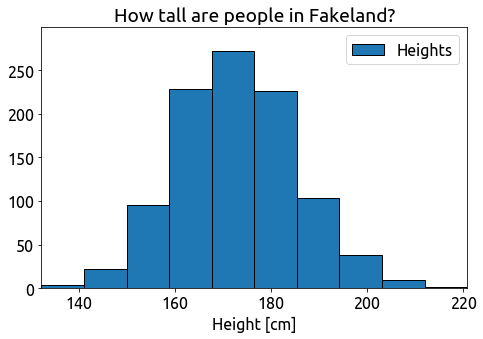

In [21]:
fig, ax = create_axis()
histogram.plot(ax=ax, lw=1, edgecolor="black")
ax.legend()
save_fig(fig, "../images/repre-meta.svg")

### Operations

In [22]:
update_matplotlib_rc(22)

Saved ../images/add1.svg


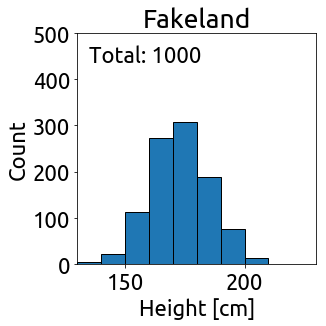

In [23]:
h = h1(heights, "human", 12)
edges = h.numpy_bins

fig, ax = square_axis()
h.plot(ax=ax, xlabel=False, ylim=(0, 500), show_stats="total", lw=1, edgecolor="black")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
ax.set_title("Fakeland")
save_fig(fig, "../images/add1.svg")

Saved ../images/add2.svg


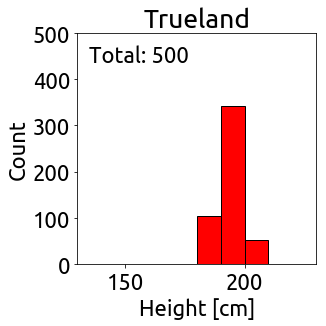

In [24]:
h_ = h1(trueland_heights, edges)
fig, ax = square_axis()
h_.plot(ax=ax, xlabel=False, ylim=(0, 500), show_stats="total", lw=1, color="red", edgecolor="black")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
ax.set_title("Trueland")
save_fig(fig, "../images/add2.svg")

Saved ../images/add.svg
Histogram1D(bins=(10,), total=1500, dtype=int64)


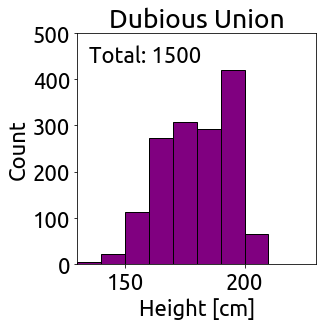

In [25]:
h_total = h + h_
h_total.title = "Dubious Union"

fig, ax = square_axis()

h_total.plot(ax=ax, xlabel=False, ylim=(0, 500), show_stats="total", lw=1, color="purple", edgecolor="black")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")

save_fig(fig, "../images/add.svg")
print(h_total)

In [26]:
# Throws exception
# h * h_

In [27]:
update_matplotlib_rc() # Back to normal size

### Multi-dimensional

Saved ../images/nd-height.svg
Saved ../images/nd-weight.svg
Saved ../images/nd-iq.svg


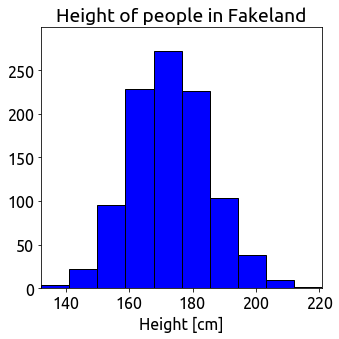

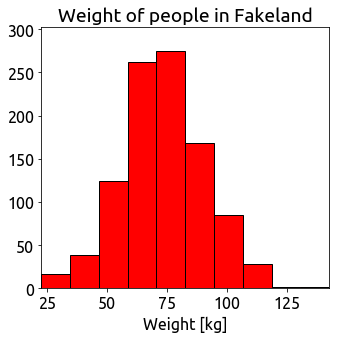

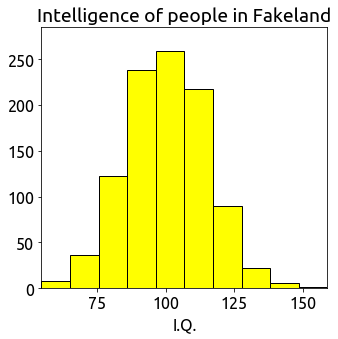

In [28]:
H = h1(heights, axis_name="Height [cm]")
H.title = "Height of people in Fakeland"

# update_matplotlib_rc(20)

# Height
fig, ax = square_axis()
H.plot(ax=ax, lw=1, color="blue", edgecolor="black")
save_fig(fig, "../images/nd-height.svg")

# Weight
fig, ax = square_axis()
H = h1(weights, axis_name="Weight [kg]")
H.title = "Weight of people in Fakeland"
H.plot(ax=ax, lw=1, color="red", edgecolor="black")
save_fig(fig, "../images/nd-weight.svg")

fig, ax = square_axis()
H = h1(iqs, axis_name="I.Q.")
H.title = "Intelligence of people in Fakeland"
H.plot(ax=ax, lw=1, color="yellow", edgecolor="black")
save_fig(fig, "../images/nd-iq.svg")

update_matplotlib_rc(16)

In [29]:
H2 = h2(heights, weights, axis_names=["height", "weight"])
print(H2)

Histogram2D(bins=(10, 10), total=1000, dtype=int64)


Saved ../images/nd-2d.svg


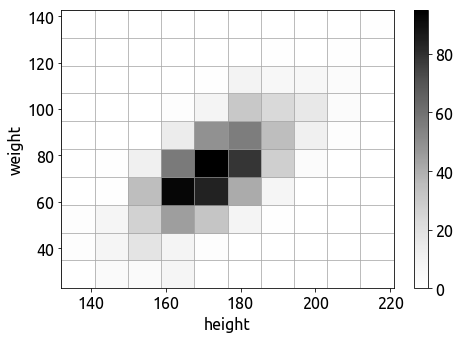

In [30]:
# 2D
fig, ax = create_axis()
H2.plot(ax=ax)
save_fig(fig, "../images/nd-2d.svg")

In [31]:
# 3D
df = pd.DataFrame({
    "height": heights,
    "weight": weights,
    "iq": iqs
})
H3 = h3(df)    #  From pandas DataFrame
print(H3)


HistogramND(bins=(10, 10, 10), total=1000, dtype=int64)


### Projection

Histogram2D(bins=(10, 10), total=1000, dtype=int64) ('height', 'weight')


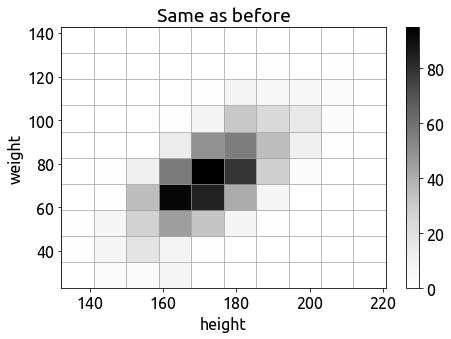

In [32]:
H2_ = H3.projection("height", "weight")
H2_.title = "Physical attributes of Fakeland people"
print(H2_, H2_.axis_names)

fig, ax = create_axis()
H2.plot(title="Same as before", ax=ax);

In [33]:
### Indexing

H3[2] =  Histogram2D(bins=(10, 10), total=96, dtype=int64)
Saved ../images/nd-index0.svg


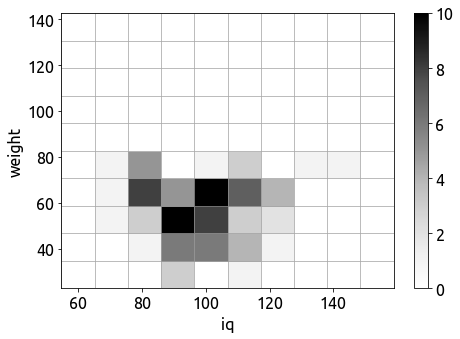

In [34]:
print("H3[2] = ", H3[2])

fig, ax = create_axis()
H3[2].plot(ax=ax, show_stats="total")
save_fig(fig, "../images/nd-index0.svg")

H3[4, 5] = Histogram1D(bins=(10,), total=57, dtype=int64)
Saved ../images/nd-index1.svg


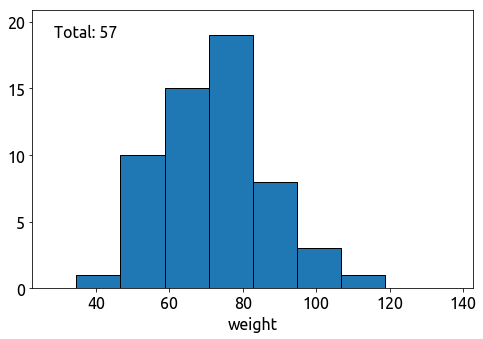

In [35]:
print("H3[4, 5] =", H3[4, 5])

fig, ax = create_axis()
H3[4, 5].plot(ax=ax, show_stats="total", lw=1, edgecolor="black")
save_fig(fig, "../images/nd-index1.svg")

H3[5, 1:5, :] = Histogram2D(bins=(4, 10), total=140, dtype=int64)
Saved ../images/nd-index2.svg


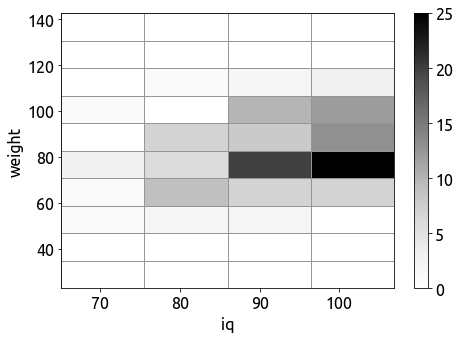

In [36]:
print("H3[5, 1:5, :] =", H3[5, 1:5, :])


fig, ax = create_axis()
H3[5, 1:5, :].plot(ax=ax, show_stats="total", lw=1, edgecolor="black")
save_fig(fig, "../images/nd-index2.svg")

In [37]:
H3[4, 5, 6]

(((167.65415240275553, 176.5216509411603),
  (106.80044162961627, 117.21906642300199),
  (94.70728437181606, 106.71267650961722)),
 3)

## Binnings

Saved ../images/bins-raw.svg
NumpyBinning(array([132.18415825, 141.05165679, 149.91915533, 158.78665386,
       167.6541524 , 176.52165094, 185.38914948, 194.25664802,
       203.12414656, 211.99164509, 220.85914363]))


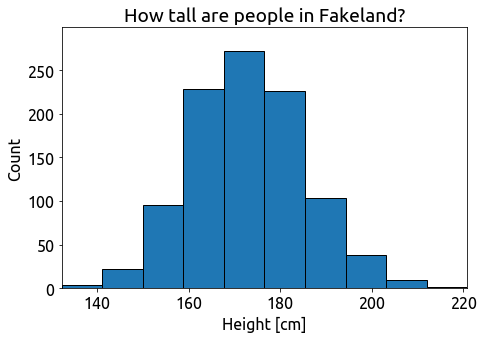

In [38]:
# Normal
H = physt.h1(heights)
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("How tall are people in Fakeland?")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-raw.svg")

print(H._binning)

Saved ../images/bins-fixed.svg
FixedWidthBinning(bin_width=2.5, bin_count=37, min=130.0)


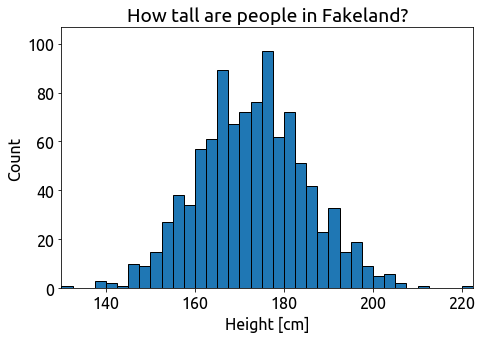

In [39]:
# Fixed width
H = physt.h1(heights, "fixed_width", 2.5)
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("How tall are people in Fakeland?")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-fixed.svg")

print(H._binning)

Saved ../images/bins-human1.svg
19
FixedWidthBinning(bin_width=5.0, bin_count=19, min=130.0)


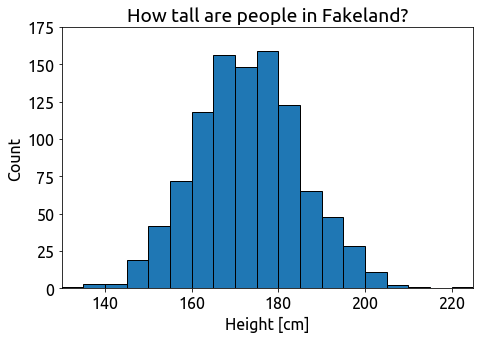

In [40]:
# Human (specified number of bins)
H = physt.h1(heights, "human", 15)
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("How tall are people in Fakeland?")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-human1.svg")
print(H.bin_count)
print(H._binning)

Saved ../images/bins-human2.svg
10
FixedWidthBinning(bin_width=10.0, bin_count=10, min=130.0)


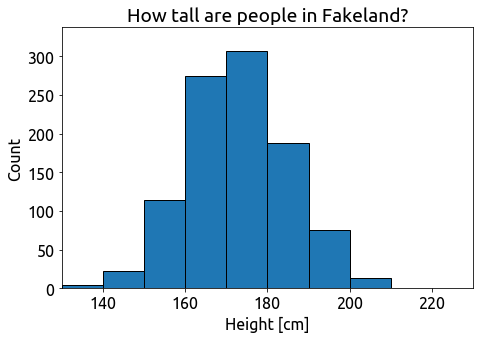

In [41]:
# Human (auto number of bins)
H = physt.h1(heights, "human")
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("How tall are people in Fakeland?")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-human2.svg")
print(H.bin_count)
print(H._binning)

Saved ../images/bins-int0.svg


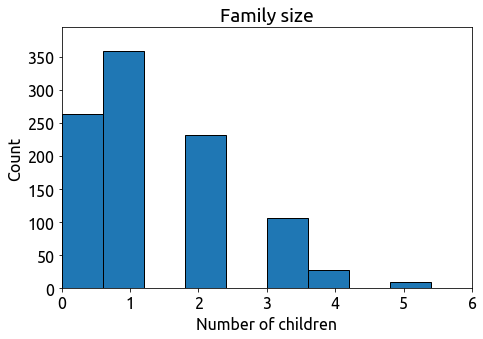

In [42]:
# Integer (strange)
H = physt.h1(children)
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("Family size")
ax.set_xlabel("Number of children")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-int0.svg")

Saved ../images/bins-int1.svg
FixedWidthBinning(bin_width=1.0, bin_count=7, min=-0.5)


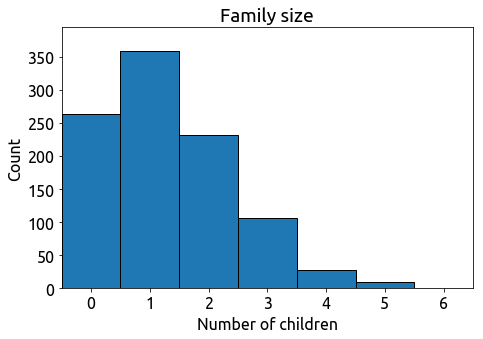

In [43]:
# Integer (right)
H = physt.h1(children, "integer")
fig, ax = create_axis()
H.plot(ax=ax, lw=1, edgecolor="black")
ax.set_title("Family size")
ax.set_xlabel("Number of children")
ax.set_ylabel("Count")
save_fig(fig, "../images/bins-int1.svg")
print(H._binning)

In [44]:
# Exponential (data)
countries.sample(10)

,Country,Population
3,Albania,2876101.0
43,Cabo Verde,539560.0
124,Madagascar,24894551.0
106,"Korea, Rep.",51245707.0
198,Turkey,79512426.0
79,Greenland,56186.0
110,Liberia,4613823.0
217,Zimbabwe,16150362.0
0,Aruba,104822.0
69,United Kingdom,65595565.0


Saved ../images/bins-nonexpo.svg
NumpyBinning(array([1.10970000e+04, 1.37876487e+08, 2.75741878e+08, 4.13607268e+08,
       5.51472658e+08, 6.89338048e+08, 8.27203439e+08, 9.65068829e+08,
       1.10293422e+09, 1.24079961e+09, 1.37866500e+09]))


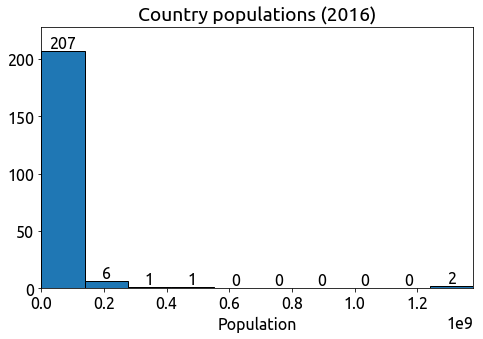

In [45]:
# Exponential (naive)
hist = physt.h1(countries["Population"])
fig, ax = create_axis()
hist.plot(ax=ax, show_values=True,
          title="Country populations (2016)", lw=1, edgecolor="black")
save_fig(fig, "../images/bins-nonexpo.svg")
print(hist.binning)

Saved ../images/bins-expo1.svg
ExponentialBinning(array([1.10970000e+04, 4.08539182e+04, 1.50404851e+05, 5.53719699e+05,
       2.03853468e+06, 7.50492286e+06, 2.76295850e+07, 1.01719096e+08,
       3.74481718e+08, 1.37866500e+09]))


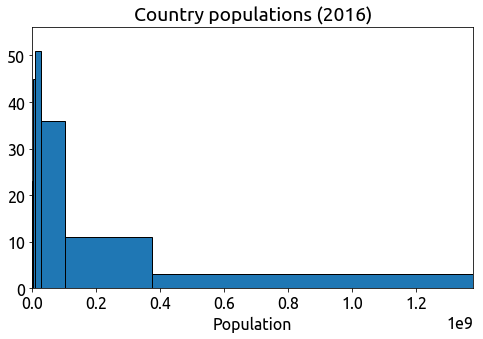

In [46]:
# Exponential (right bins)
hist = physt.h1(countries["Population"], "exponential")
fig, ax = create_axis()
hist.plot(ax=ax, show_values=False,
          title="Country populations (2016)", lw=1, edgecolor="black")
save_fig(fig, "../images/bins-expo1.svg")
print(hist.binning)

Saved ../images/bins-expo2.svg


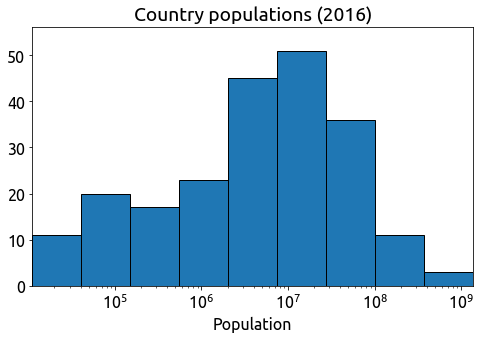

In [47]:
# Exponential (change scale)
fig, ax = create_axis()
hist.plot(ax=ax, show_values=False,
          title="Country populations (2016)", lw=1, edgecolor="black",
         xscale="log")
save_fig(fig, "../images/bins-expo2.svg")

Saved ../images/bins-expo3.svg
ExponentialBinning(array([1.00000000e+04, 3.16227766e+04, 1.00000000e+05, 3.16227766e+05,
       1.00000000e+06, 3.16227766e+06, 1.00000000e+07, 3.16227766e+07,
       1.00000000e+08, 3.16227766e+08, 1.00000000e+09, 3.16227766e+09,
       1.00000000e+10]))


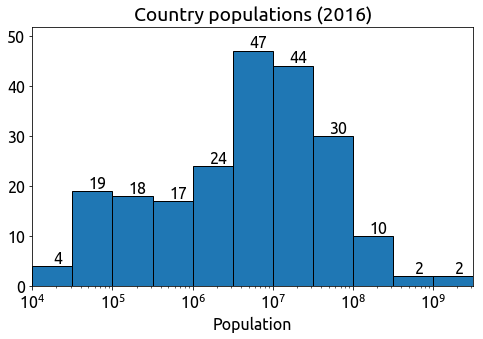

In [48]:
# Exponential (nicer bins)
hist = physt.h1(countries["Population"], "exponential", 12, range=(10000, 1e10))
fig, ax = create_axis()
hist[:-1].plot(ax=ax, show_values=True,
          title="Country populations (2016)", xscale="log", lw=1, edgecolor="black")
save_fig(fig, "../images/bins-expo3.svg")

print(hist._binning)


## Dynamic histograms

Saved ../images/dynamic0.svg


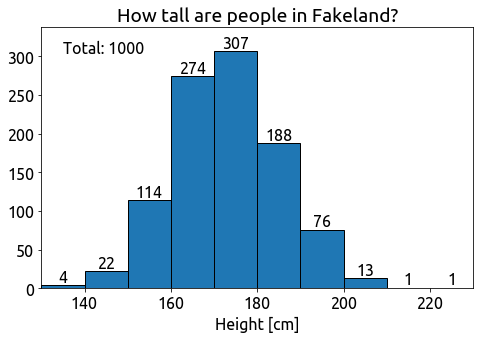

In [49]:
H = h1(heights, "fixed_width", 10, axis_name="Height [cm]")
H.title = "How tall are people in Fakeland?"

fig, ax = create_axis()
H.plot(ax=ax, show_stats="total", lw=1, edgecolor="black", show_values=True)
save_fig(fig, "../images/dynamic0.svg")

H_copy = H.copy()   # keep for overlaying

In [50]:
# Add value
H << 190

# or h.fill(190)

H

Histogram1D(bins=(10,), total=1001, dtype=int64)

Saved ../images/dynamic1.svg


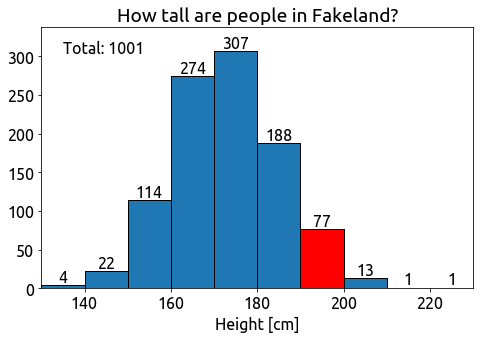

In [51]:
# Plot of added value
fig, ax = create_axis()
H.plot(ax=ax, show_stats="total", color="red",
       lw=1, edgecolor="black", show_values=True)
H_copy.plot(ax=ax, lw=1, edgecolor="black")
H[6:7].plot(ax=ax, color="red", lw=1, edgecolor="black")
ax.set_xlim(H.bin_left_edges[0], H.bin_right_edges[-1])
save_fig(fig, "../images/dynamic1.svg")

Saved ../images/dynamic2.svg


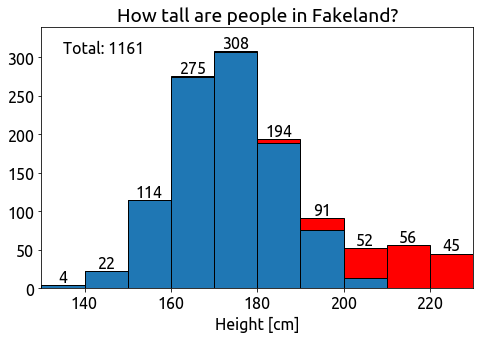

In [52]:
# Add more values (200)
H.fill_n(basketball_heights) 

fig, ax = create_axis()
H.plot(ax=ax, show_stats="total", color="red", lw=1, edgecolor="black", show_values=True)
H_copy.plot(ax=ax, lw=1, edgecolor="black")
save_fig(fig, "../images/dynamic2.svg")

In [53]:
# We are missing 40 values!
H

Histogram1D(bins=(10,), total=1161, dtype=int64)

### Adaptive binning

Works only for fixed-width (currently)

In [54]:
H = H_copy.copy()
H << 190
H.adaptive = True

# or h1(..., adaptive=True)
H.fill_n(basketball_heights) 
print(H)


Histogram1D(bins=(13,), total=1201, dtype=int64)


In [55]:
print(H.binning)

FixedWidthBinning(bin_width=10.0, bin_count=13, min=130.0, adaptive=True)


Saved ../images/dynamic3.svg


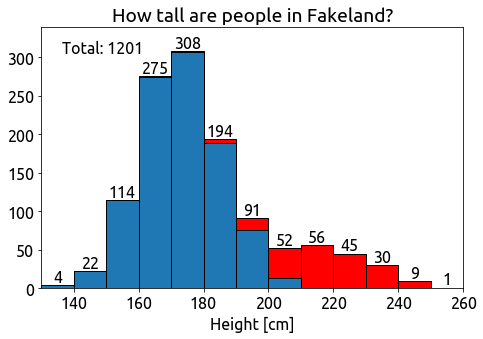

In [56]:
fig, ax = create_axis()
H.plot(ax=ax, show_stats="total", color="red",
       lw=1, edgecolor="black", show_values=True)
H_copy.plot(ax=ax, lw=1, edgecolor="black", xlim="keep")
save_fig(fig, "../images/dynamic3.svg")

In [57]:
H = H_copy.copy()
H << 190
H.adaptive = True
H_alt = h1(basketball_heights, "fixed_width", H.binning.bin_width)
H_alt.adaptive = True
print(H_alt)
print(H_alt.binning)

Histogram1D(bins=(10,), total=200, dtype=int64)
FixedWidthBinning(bin_width=10.0, bin_count=10, min=160.0, adaptive=True)


In [58]:
H + H_alt

Histogram1D(bins=(13,), total=1201, dtype=int64)

## Plotting

In [59]:
H = h1(heights, axis_name="Height [cm]")
H.title = "Height of people in Fakeland"

Saved ../images/bar.svg


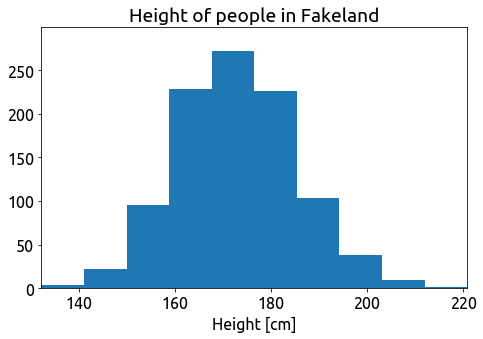

In [60]:
# Default
fig, ax = create_axis()
H.plot(ax=ax)
save_fig(fig, "../images/bar.svg")

Saved ../images/step.svg


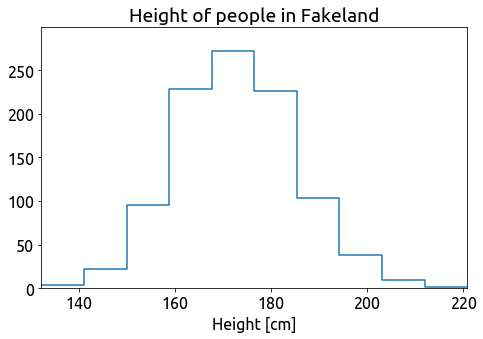

In [61]:
fig, ax = create_axis()
H.plot.step(ax=ax)
save_fig(fig, "../images/step.svg")

Saved ../images/scatter.svg


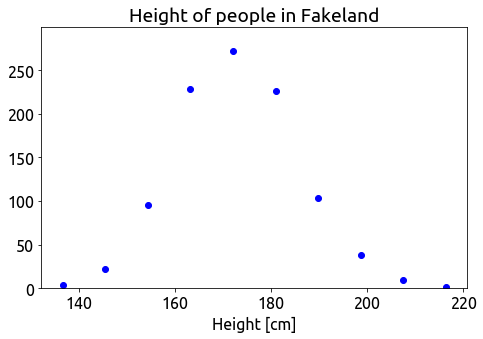

In [62]:
fig, ax = create_axis()
H.plot("scatter", ax=ax)
save_fig(fig, "../images/scatter.svg")

Saved ../images/line.svg


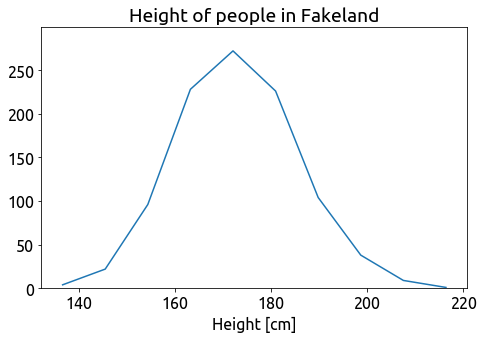

In [63]:
fig, ax = create_axis()
H.plot("line", ax=ax)
save_fig(fig, "../images/line.svg")

Saved ../images/fill.svg


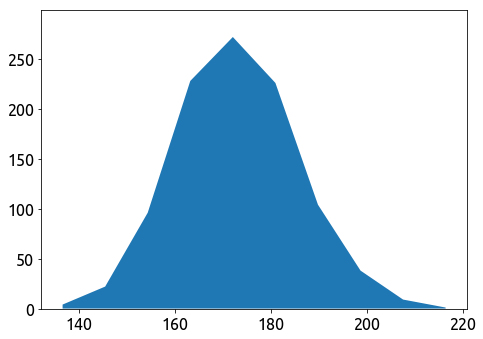

In [64]:
fig, ax = create_axis()
H.plot.fill(ax=ax)
save_fig(fig, "../images/fill.svg")

In [65]:
### Customization

Saved ../images/bar1.svg


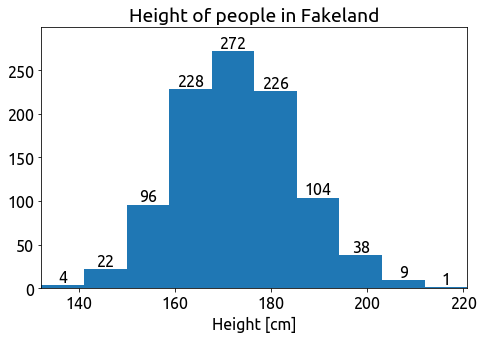

In [66]:
fig, ax = create_axis()
H.plot(ax=ax, show_values=True)
save_fig(fig, "../images/bar1.svg")

Saved ../images/bar2.svg


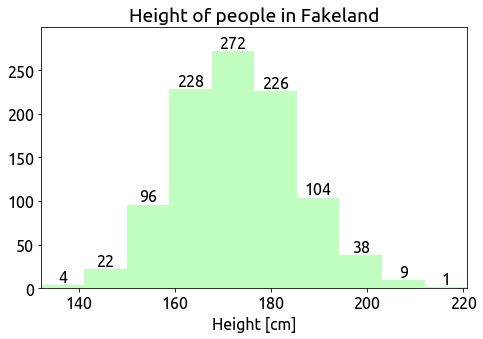

In [67]:
fig, ax = create_axis()
H.plot(ax=ax, show_values=True, color="#c0ffc0")
save_fig(fig, "../images/bar2.svg")

Saved ../images/bar3.svg


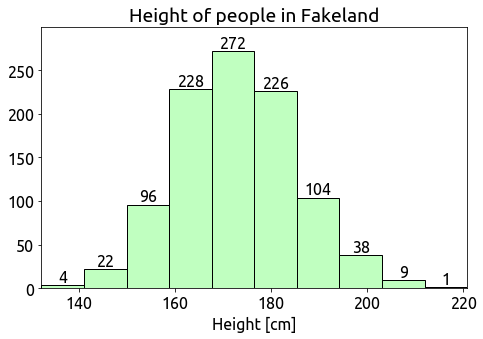

In [68]:
fig, ax = create_axis()
H.plot(ax=ax, show_values=True, color="#c0ffc0", lw=1, edgecolor="black")
save_fig(fig, "../images/bar3.svg")

Saved ../images/bar-cmap.svg


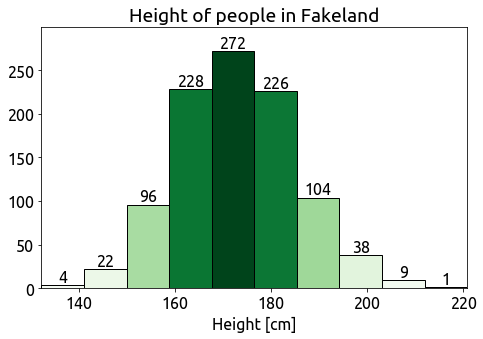

In [69]:
fig, ax = create_axis()
H.plot(ax=ax, show_values=True, cmap="Greens", lw=1, edgecolor="black")
save_fig(fig, "../images/bar-cmap.svg")

Saved ../images/bar-err.svg


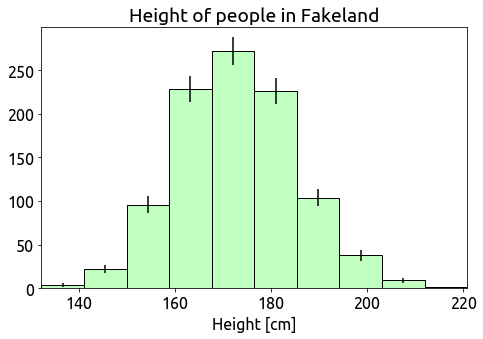

In [70]:
fig, ax = create_axis()
H.plot(ax=ax, color="#c0ffc0", lw=1, edgecolor="black",
      errors=True)
save_fig(fig, "../images/bar-err.svg")

Saved ../images/bar-stats.svg


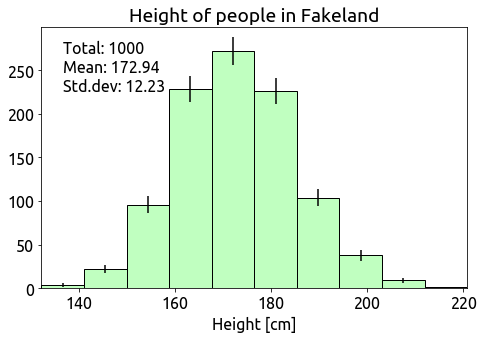

In [71]:
fig, ax = create_axis()
H.plot(ax=ax, color="#c0ffc0", lw=1, edgecolor="black",
      errors=True, show_stats=True)
save_fig(fig, "../images/bar-stats.svg")

### 2D plots

Saved ../images/map.svg


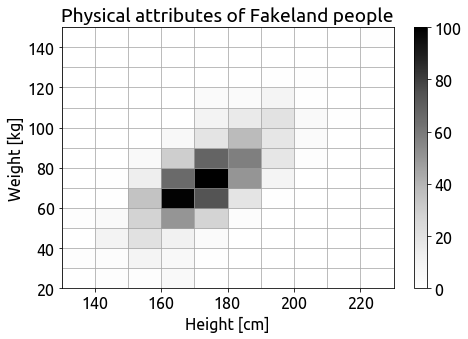

In [72]:
H2 = h2(heights, weights, "human", axis_names=["Height [cm]", "Weight [kg]"])
H2.title = "Physical attributes of Fakeland people"
fig, ax = create_axis()
H2.plot(ax=ax)
save_fig(fig, "../images/map.svg")

Saved ../images/map-lw0.svg


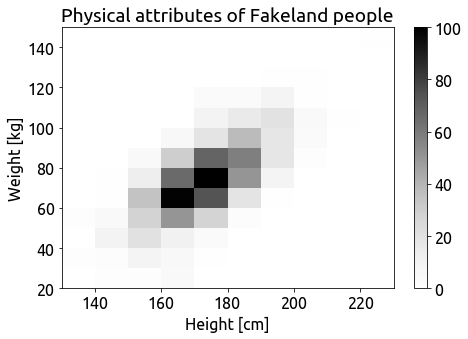

In [73]:
fig, ax = create_axis()
H2.plot(ax=ax, lw=0)
save_fig(fig, "../images/map-lw0.svg")

Saved ../images/map-lw0-values.svg


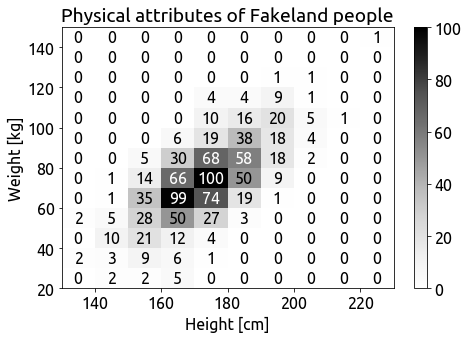

In [74]:
fig, ax = create_axis()
H2.plot(ax=ax, lw=0, show_values=True)
save_fig(fig, "../images/map-lw0-values.svg")

Saved ../images/map-0-rainbow.svg


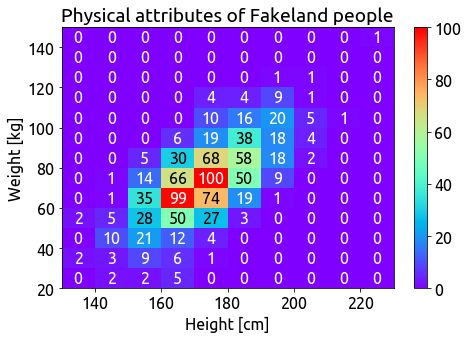

In [75]:
fig, ax = create_axis()
H2.plot(ax=ax, lw=0, show_values=True, cmap="rainbow")
save_fig(fig, "../images/map-0-rainbow.svg")

Saved ../images/map-rainbow.svg


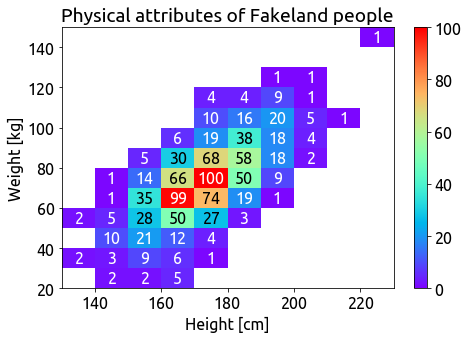

In [76]:
fig, ax = create_axis()
H2.plot(ax=ax, lw=0, show_values=True, cmap="rainbow", show_zero=False)
save_fig(fig, "../images/map-rainbow.svg")

Saved ../images/map-rainbow-log.svg


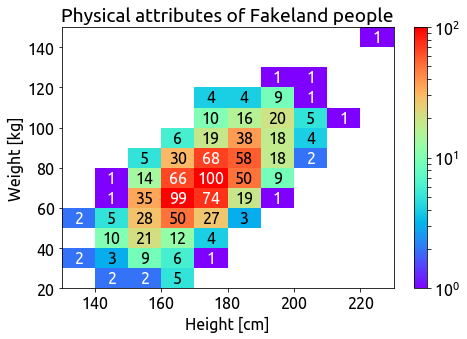

In [77]:
fig, ax = create_axis()
H2.plot(ax=ax, lw=0, show_values=True, cmap="rainbow", show_zero=False, cmap_normalize="log")
save_fig(fig, "../images/map-rainbow-log.svg")

Histogram2D(bins=(400, 400), total=1000000, dtype=int64)
Saved ../images/image.svg


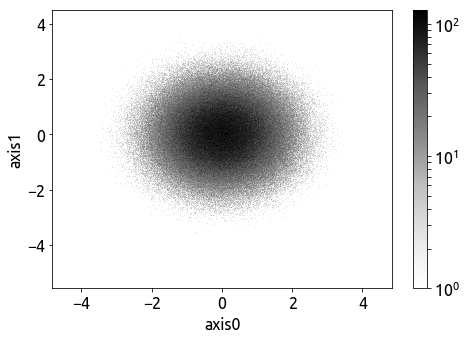

In [78]:
### Big image

data = np.empty((1000000, 2))
data[:, 0] = np.random.normal(0, 1, 1000000)
data[:, 1] = np.random.normal(0, 1, 1000000)

h = h2(data[:,0], data[:,1], 400)

print(h)

fig, ax = create_axis()
h.plot("image", ax=ax, cmap_normalize="log")
save_fig(fig, "../images/image.svg")

Saved ../images/globe.svg


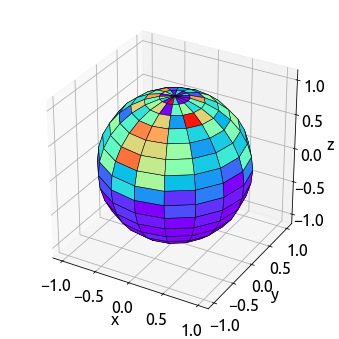

In [79]:
# Globe
data = np.empty((1000, 3))
data[:,0] = np.random.normal(0, 1, 1000)
data[:,1] = np.random.normal(0, 1.3, 1000)
data[:,2] = np.random.normal(1, .6, 1000)

# Get histogram data (in spherical coordinates)
h = physt.special.spherical_histogram(data)                 

# And plot its projection on a globe
# fig, ax = plt.subplots()
ax = h.projection("theta", "phi").plot.globe_map(density=True, figsize=(5, 5), cmap="rainbow", lw=0.5) 

fig = ax.figure
save_fig(fig, "../images/globe.svg")


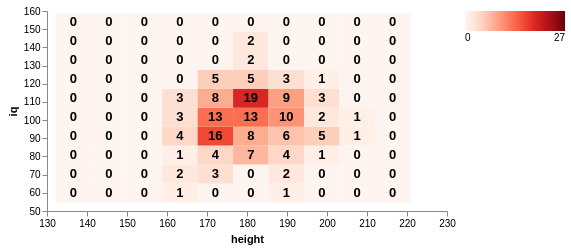

In [91]:
kwargs = dict( cmap="Reds", show_values=True)
H3.plot(backend="vega", width=1280, height=768, write_to="vega.html", **kwargs)
H3.plot(backend="vega", **kwargs)